# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [7]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables relative to whether someone got admitted or not. Think in terms of for a certain prestige level, how many people got admitted and didnt get admitted

In [8]:
# frequency table for prestige and whether or not someone was admitted
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [9]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: One less than the number of categories. In this case we would take prestiege dummy variables 2-4 when passing through a model, since the least relevant calss is usually the one that is dropped. We can see from the frequency table that prestige=1 has the lowest number of frequensies

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [10]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1.0':]) 
handCalc.head()
pd.crosstab(handCalc['prestige_1.0'],handCalc.admit, margins=True)

admit,0,1,All
prestige_1.0,,,
0.0,243,93,336
1.0,28,33,61
All,271,126,397


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

Answer: chance of admission is 33:28


In [108]:
print (33.0/28)

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

Answer: chance of admission is 93:243

In [109]:
print (93.0/243)

0.382716049383


#### 3.3 Calculate the odds ratio

In [110]:
print 'odds ratio =', ((33.0/28)/(93.0/243))

odds ratio = 3.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer: the odds of a student attending number 1 collage getting admitted is 3.08 times higher than the odds if they did not attend

#### 3.5 Print the cross tab for prestige_4

In [11]:
pd.crosstab(handCalc['prestige_4.0'],handCalc.admit, margins=True)

admit,0,1,All
prestige_4.0,,,
0.0,216,114,330
1.0,55,12,67
All,271,126,397


#### 3.6 Calculate the OR 

In [112]:
print 'odds ratio =', ((12.0/55)/(114.0/216))

odds ratio = 0.413397129187


#### 3.7 Write this finding in a sentence

Answer: A student attending a number 4 rancked college has odds that are 41% lower than if they attended a hgher ranked collage

## Part 4. Analysis

In [13]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [14]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [15]:
train_cols = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0', 'intercept']


#### 4.2 Fit the model

In [16]:
logit_mod = sm.Logit(data['admit'], data[train_cols])
logit_res = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [17]:
print logit_res.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 22 Nov 2016   Pseudo R-squ.:                 0.08166
Time:                        18:52:24   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [18]:
np.exp(logit_res.params) #odd ratio

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64

In [27]:
params = logit_res.params
conf = logit_res.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
gre,1.000074,1.004372,1.002221
gpa,1.136120,4.183113,2.180027
prestige_2.0,0.272168,0.942767,0.506548
prestige_3.0,0.133377,0.515419,0.262192
prestige_4.0,0.093329,0.479411,0.211525
intercept,0.002207,0.194440,0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: The chance of admission is 51% lower if the student attends a number 2 ranked collage than otherwise

#### 4.6 Interpret the OR of GPA

Answer: for each unit increase in GPA increases odds of admission by 2.2

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [28]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [31]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
combos.columns = ['gre','gpa','prestige','intercept']
combos.head()

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


,gre,gpa,prestige,intercept
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


#### 5.1 Recreate the dummy variables

In [32]:
# recreate the dummy variables
dummy = pd.get_dummies(combos['prestige'],prefix='prestige')

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa','prestige','intercept']
combos = combos[cols_to_keep].join(dummy.ix[:, 'prestige_2.0':])
combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,1.0,1.0,0.0,0.0,0.0
1,220.0,2.260000,2.0,1.0,1.0,0.0,0.0
2,220.0,2.260000,3.0,1.0,0.0,1.0,0.0
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0
4,220.0,2.453333,1.0,1.0,0.0,0.0,0.0


#### 5.2 Make predictions on the enumerated dataset

In [33]:
combos['admit_pred'] = logit_res.predict(combos[train_cols])
combos.head()
combos.tail(4)

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
396,800.0,4.0,1.0,1.0,0.0,0.0,0.0,0.734040
397,800.0,4.0,2.0,1.0,1.0,0.0,0.0,0.582995
398,800.0,4.0,3.0,1.0,0.0,1.0,0.0,0.419833
399,800.0,4.0,4.0,1.0,0.0,0.0,1.0,0.368608


#### 5.3 Interpret findings for the last 4 observations

Answer: Answer: For a GPA score of 4 and GRE score there is a 73% probability of being admitted if you come form a umber 1 ranked school, 58% probability of admission if the school is ranked number 2, 41% probability if the school is ranked 3 and 36% pribability if the school is ranked number 4.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

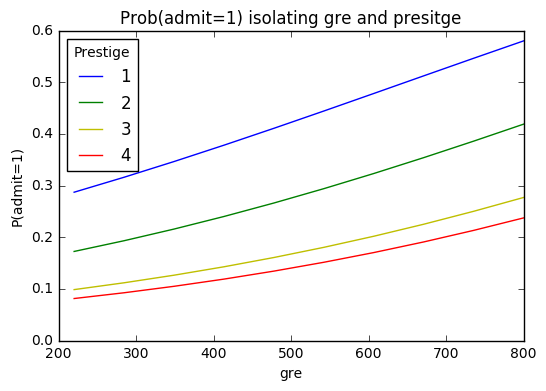

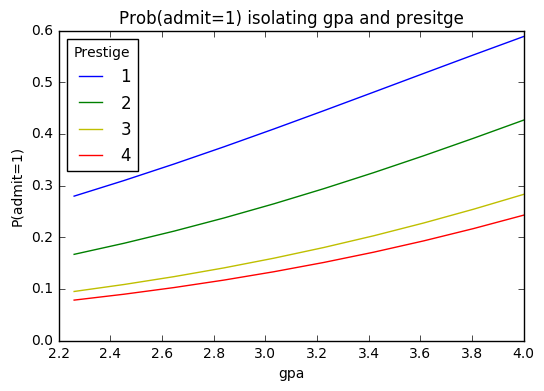

In [34]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()


isolate_and_plot('gre')
isolate_and_plot('gpa')



